In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.lines import Line2D

from OffManifoldLearning.decoders import VelocityDecoder
from OffManifoldLearning.training import TrainController
from OffManifoldLearning.util import calc_intrinsic_manifold
import OffManifoldLearning.globals as gl
import os

plt.style.use('default')

reds = list(plt.cm.Reds(np.linspace(0.2, 0.6, 5)))
blues = list(plt.cm.Blues(np.linspace(0.2, 0.6, 5)))

In [4]:
gr = 'stroke'
sn = 100

W = np.load(os.path.join(gl.baseDir, 'controller_training', f'W_dec.{gr}.{sn}.npy'))
F = np.load(os.path.join(gl.baseDir, 'baseline', f'single_finger.pretraining.{gr}.{sn}.npy'))
A0 = np.load(os.path.join(gl.baseDir, 'baseline', f'basis_vectors.{gr}.{sn}.npy'))
d = 5
Nc = A0.shape[0]
F_c = F.reshape(-1, Nc)
B = calc_intrinsic_manifold(F_c, d)
VD = VelocityDecoder(B, W, angle=1)

In [6]:
group = ['stroke', 'intact']
tinfo = pd.read_csv(os.path.join(gl.baseDir, 'baseline', 'tinfo.tsv'), sep='\t')
#tinfo = tinfo[(tinfo.subj_id<110)]
log_training = pd.DataFrame()
mapping = ['on', 'off']
for gr in group:
    for ang in [0, 30, 50, 70, 90]:
        for sn in tinfo.subj_id.unique():
            log = pd.read_csv(os.path.join(gl.baseDir, 'controller_training', f'log_training.{ang}.{gr}.{sn}.tsv'), sep='\t')
            #log['angle'] = f'{ang}°'
            log_ds = log[::20]
            log_training = pd.concat([log_training, log_ds])

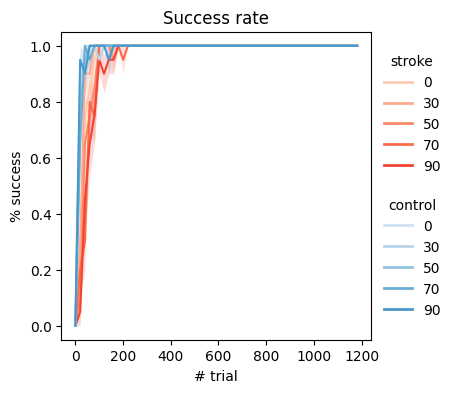

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))

metric = 'success'
sb.lineplot(ax=ax, data=log_training[log_training.group == 'stroke'], x='TN', y=metric, hue='angle', errorbar='se', palette=reds, err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[log_training.group == 'intact'], x='TN', y=metric, hue='angle', errorbar='se', palette=blues, err_kws={'lw': 0})
ax.set_title('Success rate')
ax.set_ylabel('% success')
ax.set_xlabel('# trial')

angles = sorted(log_training['angle'].unique())
handles_stroke = [Line2D([0], [0], color=reds[i], lw=2) for i in range(len(angles))]
handles_intact = [Line2D([0], [0], color=blues[i], lw=2) for i in range(len(angles))]
leg1 = ax.legend(handles_stroke, angles, title='stroke', loc='lower left', bbox_to_anchor=(1, .5), frameon=False)
leg2 = ax.legend(handles_intact, angles, title='control', loc='upper left', bbox_to_anchor=(1, .5), frameon=False)
ax.add_artist(leg1)   # keep first legend


plt.show()

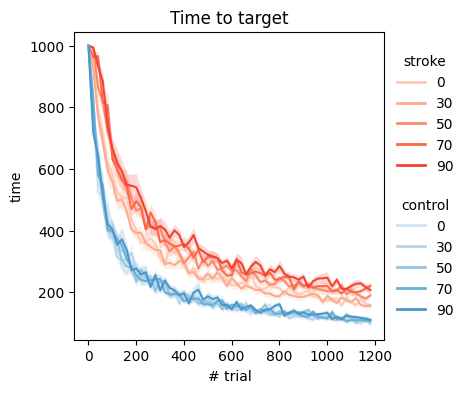

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

metric = 'nsteps'
sb.lineplot(ax=ax, data=log_training[log_training.group == 'stroke'], x='TN', y=metric, hue='angle', errorbar='se', palette=reds, err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[log_training.group == 'intact'], x='TN', y=metric, hue='angle', errorbar='se', palette=blues, err_kws={'lw': 0})
ax.set_title('Time to target')
ax.set_ylabel('time')
ax.set_xlabel('# trial')

angles = sorted(log_training['angle'].unique())
handles_stroke = [Line2D([0], [0], color=reds[i], lw=2) for i in range(len(angles))]
handles_intact = [Line2D([0], [0], color=blues[i], lw=2) for i in range(len(angles))]
leg1 = ax.legend(handles_stroke, angles, title='stroke', loc='lower left', bbox_to_anchor=(1, .5), frameon=False)
leg2 = ax.legend(handles_intact, angles, title='control', loc='upper left', bbox_to_anchor=(1, .5), frameon=False)
ax.add_artist(leg1)   # keep first legend


plt.show()

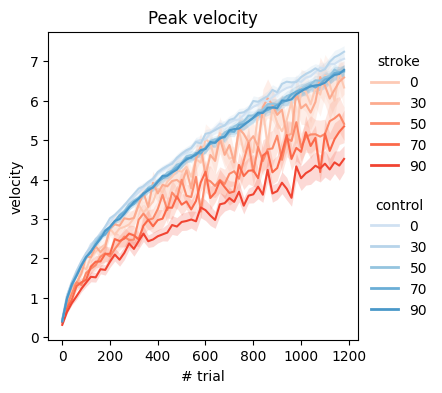

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

metric = 'velMax'
sb.lineplot(ax=ax, data=log_training[log_training.group == 'stroke'], x='TN', y=metric, hue='angle', errorbar='se', palette=reds, err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[log_training.group == 'intact'], x='TN', y=metric, hue='angle', errorbar='se', palette=blues, err_kws={'lw': 0})
ax.set_title('Peak velocity')
ax.set_ylabel('velocity')
ax.set_xlabel('# trial')

angles = sorted(log_training['angle'].unique())
handles_stroke = [Line2D([0], [0], color=reds[i], lw=2) for i in range(len(angles))]
handles_intact = [Line2D([0], [0], color=blues[i], lw=2) for i in range(len(angles))]
leg1 = ax.legend(handles_stroke, angles, title='stroke', loc='lower left', bbox_to_anchor=(1, .5), frameon=False)
leg2 = ax.legend(handles_intact, angles, title='control', loc='upper left', bbox_to_anchor=(1, .5), frameon=False)
ax.add_artist(leg1)   # keep first legend


plt.show()

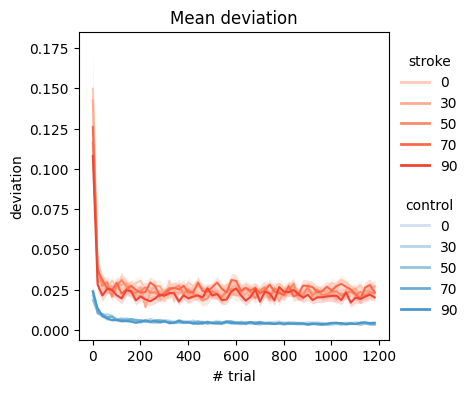

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))

metric = 'meanDev'
sb.lineplot(ax=ax, data=log_training[log_training.group == 'stroke'], x='TN', y=metric, hue='angle', errorbar='se', palette=reds, err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[log_training.group == 'intact'], x='TN', y=metric, hue='angle', errorbar='se', palette=blues, err_kws={'lw': 0})
ax.set_title('Mean deviation')
ax.set_ylabel('deviation')
ax.set_xlabel('# trial')

angles = sorted(log_training['angle'].unique())
handles_stroke = [Line2D([0], [0], color=reds[i], lw=2) for i in range(len(angles))]
handles_intact = [Line2D([0], [0], color=blues[i], lw=2) for i in range(len(angles))]
leg1 = ax.legend(handles_stroke, angles, title='stroke', loc='lower left', bbox_to_anchor=(1, .5), frameon=False)
leg2 = ax.legend(handles_intact, angles, title='control', loc='upper left', bbox_to_anchor=(1, .5), frameon=False)
ax.add_artist(leg1)   # keep first legend


plt.show()

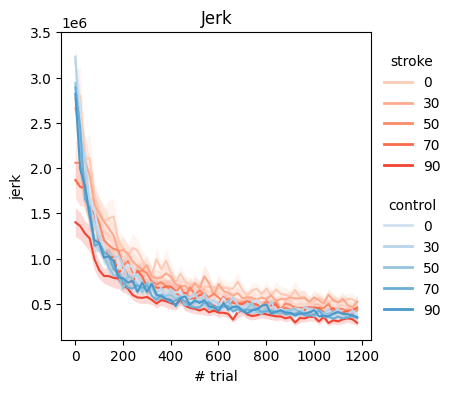

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))

metric = 'jerk'
sb.lineplot(ax=ax, data=log_training[log_training.group == 'stroke'], x='TN', y=metric, hue='angle', errorbar='se', palette=reds, err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[log_training.group == 'intact'], x='TN', y=metric, hue='angle', errorbar='se', palette=blues, err_kws={'lw': 0})
ax.set_title('Jerk')
ax.set_ylabel('jerk')
ax.set_xlabel('# trial')

angles = sorted(log_training['angle'].unique())
handles_stroke = [Line2D([0], [0], color=reds[i], lw=2) for i in range(len(angles))]
handles_intact = [Line2D([0], [0], color=blues[i], lw=2) for i in range(len(angles))]
leg1 = ax.legend(handles_stroke, angles, title='stroke', loc='lower left', bbox_to_anchor=(1, .5), frameon=False)
leg2 = ax.legend(handles_intact, angles, title='control', loc='upper left', bbox_to_anchor=(1, .5), frameon=False)
ax.add_artist(leg1)   # keep first legend


plt.show()